In [1]:
import os
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
os.chdir("/home/stotoshka/Documents/ANGEL_dev")


# Подготовка выборок для обучения


In [6]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
for w in 2 3 4
do
	echo "Window radius = "$w
	python Proteasome/in_vivo/prepareTrain.py -t 20 -w $w
done

Window radius = 2
Num substrate = 56187
Num fragments = 313811
Fold 0:
Train 44949
1    15927
0    15927
Name: activity, dtype: int64
1    15938
0    15938
Name: activity, dtype: int64
1    15951
0    15951
Name: activity, dtype: int64
1    15902
0    15902
Name: activity, dtype: int64
1    15823
0    15823
Name: activity, dtype: int64
1    15780
0    15780
Name: activity, dtype: int64
1    15897
0    15897
Name: activity, dtype: int64
1    15929
0    15929
Name: activity, dtype: int64
1    15924
0    15924
Name: activity, dtype: int64
1    15881
0    15881
Name: activity, dtype: int64
1    15912
0    15912
Name: activity, dtype: int64
1    15913
0    15913
Name: activity, dtype: int64
1    15957
0    15957
Name: activity, dtype: int64
1    15921
0    15921
Name: activity, dtype: int64
1    15921
0    15921
Name: activity, dtype: int64
1    15913
0    15913
Name: activity, dtype: int64
1    15946
0    15946
Name: activity, dtype: int64
1    15928
0    15928
Name: activity, dtype: int64

# Конвертация в SDF


In [6]:
to_convert_files = glob("Proteasome/in_vivo/train/*_ready_*.csv")
print(to_convert_files)

['Proteasome/in_vivo/train/train_ready_invivo_3_1.csv', 'Proteasome/in_vivo/train/train_ready_invivo_2_1.csv', 'Proteasome/in_vivo/train/test_ready_invivo_3_3.csv', 'Proteasome/in_vivo/train/test_ready_invivo_4_0.csv', 'Proteasome/in_vivo/train/test_ready_invivo_3_1.csv', 'Proteasome/in_vivo/train/train_ready_invivo_4_0.csv', 'Proteasome/in_vivo/train/test_ready_invivo_3_4.csv', 'Proteasome/in_vivo/train/test_ready_invivo_3_2.csv', 'Proteasome/in_vivo/train/train_ready_invivo_4_3.csv', 'Proteasome/in_vivo/train/train_ready_invivo_4_4.csv', 'Proteasome/in_vivo/train/train_ready_invivo_3_4.csv', 'Proteasome/in_vivo/train/train_ready_invivo_2_2.csv', 'Proteasome/in_vivo/train/train_ready_invivo_3_3.csv', 'Proteasome/in_vivo/train/test_ready_invivo_4_4.csv', 'Proteasome/in_vivo/train/test_ready_invivo_4_3.csv', 'Proteasome/in_vivo/train/test_ready_invivo_2_0.csv', 'Proteasome/in_vivo/train/test_ready_invivo_3_0.csv', 'Proteasome/in_vivo/train/test_ready_invivo_2_2.csv', 'Proteasome/in_vivo

In [32]:
%%time
for file in to_convert_files:
	print(file)
	path_to_config = "Proteasome/in_vivo/converter_config.json"
	command = f"python tools/generateConfigForConverter.py -i {os.path.join(os.getcwd(),file)} -o {os.path.join(os.getcwd(),'Proteasome/in_vivo/sdf')} -c peptide -t 10 {path_to_config}"
	os.system(command)
	print("Convertation")
	convert_command = f"python tools/SeqToSDF.py {path_to_config}"
	os.system(convert_command)

Proteasome/in_vivo/train/train_ready_invivo_3_1.csv
Success
Convertation
Success
--- 292.93421697616577 seconds ---
Proteasome/in_vivo/train/train_ready_invivo_2_1.csv
Success
Convertation
Success
--- 109.00865411758423 seconds ---
Proteasome/in_vivo/train/test_ready_invivo_3_3.csv
Success
Convertation
Success
--- 87.57502627372742 seconds ---
Proteasome/in_vivo/train/test_ready_invivo_4_0.csv
Success
Convertation
Success
--- 169.79649019241333 seconds ---
Proteasome/in_vivo/train/test_ready_invivo_3_1.csv
Success
Convertation
Success
--- 78.4589593410492 seconds ---
Proteasome/in_vivo/train/train_ready_invivo_4_0.csv
Success
Convertation
Success
--- 659.0977578163147 seconds ---
Proteasome/in_vivo/train/test_ready_invivo_3_4.csv
Success
Convertation
Success
--- 75.73297500610352 seconds ---
Proteasome/in_vivo/train/test_ready_invivo_3_2.csv
Success
Convertation
Success
--- 82.9167947769165 seconds ---
Proteasome/in_vivo/train/train_ready_invivo_4_3.csv
Success
Convertation
Success
---

# Запуск

Осуществлялся вручную в GUI версии PASS


# Обработка результатов

In [22]:
%%bash
cp /media/stotoshka/22DC267FDC264D7B/Users/Антон/Desktop/diplom/invivo/models/*_CRV.LOG ~/Documents/ANGEL_dev/Proteasome/in_vivo/results/5CV/internal/
cp /media/stotoshka/22DC267FDC264D7B/Users/Антон/Desktop/diplom/invivo/result/*.CSV ~/Documents/ANGEL_dev/Proteasome/in_vivo/results/5CV/external/

In [23]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
python Proteasome/parse5CV.py internal GUI /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vivo/results/5CV/internal /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vivo/results/5CV/internal.xlsx
python Proteasome/parse5CV.py external GUI /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vivo/results/5CV/external /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vivo/results/5CV/external.xlsx

## Внутренняя валидация


In [5]:
internal_result = pd.read_excel("Proteasome/in_vivo/results/5CV/internal.xlsx").query("activity == 1")
internal_result.head()

,model_name,window,fold,descriptor_level,iap,twentyCV,activity,num_subst
0,invivo,2,4,3,0.7756,0.7756,1,120547
2,invivo,4,0,4,0.7302,0.7301,1,216783
4,invivo,4,0,2,0.6510,0.6511,1,193034
6,invivo,4,1,9,0.8636,0.8625,1,216401
8,invivo,4,1,10,0.8608,0.8590,1,216401


In [6]:
m_2 = internal_result.query("window == 2")
m_3 = internal_result.query("window == 3")
m_4 = internal_result.query("window == 4")

<Axes: title={'center': 'In vivo, Радиус - 2 а.о.'}, xlabel='Уровень MNA дескрипторов', ylabel='AUC ROC 20CV'>

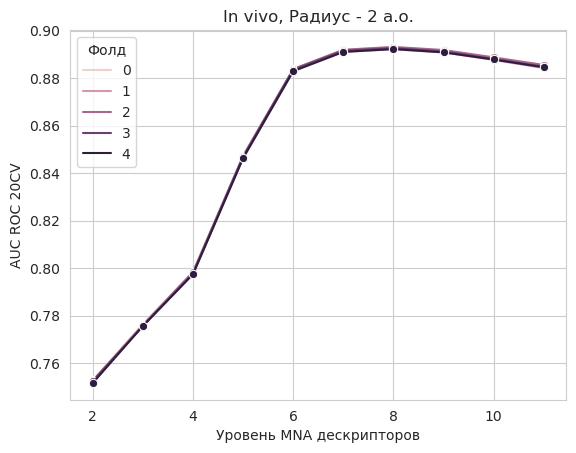

In [8]:
m_2_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_2, hue='fold', marker="o")
plt.xlabel("Уровень MNA дескрипторов")
plt.ylabel("AUC ROC 20CV")
plt.title("In vivo, Радиус - 2 а.о.")
plt.legend(title = "Фолд")
plt.savefig("Proteasome/in_vivo/results/5CV/plots/m_2.png")
m_2_internal_plot

<Axes: title={'center': 'In vivo, Радиус - 3 а.о.'}, xlabel='Уровень MNA дескрипторов', ylabel='AUC ROC 20CV'>

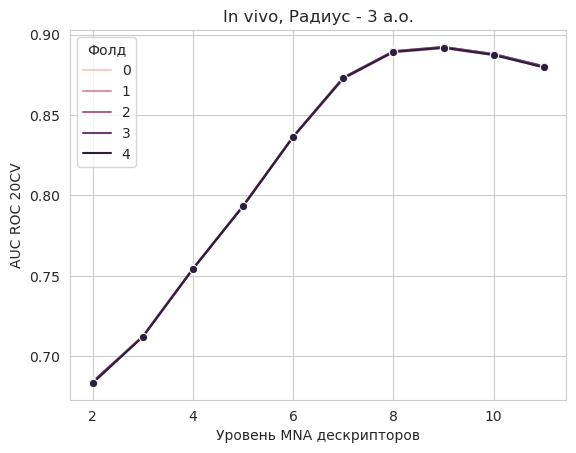

In [9]:
m_3_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_3, hue='fold', marker="o")
plt.xlabel("Уровень MNA дескрипторов")
plt.ylabel("AUC ROC 20CV")
plt.title("In vivo, Радиус - 3 а.о.")
plt.legend(title = "Фолд")
plt.savefig("Proteasome/in_vivo/results/5CV/plots/m_3.png")
m_3_internal_plot

<Axes: title={'center': 'In vivo, Радиус - 4 а.о.'}, xlabel='Уровень MNA дескрипторов', ylabel='AUC ROC 20CV'>

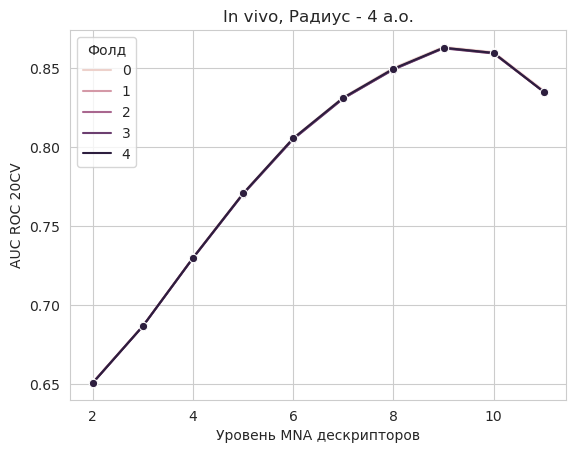

In [10]:
m_4_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_4, hue='fold', marker="o")
plt.xlabel("Уровень MNA дескрипторов")
plt.ylabel("AUC ROC 20CV")
plt.title("In vivo, Радиус - 4 а.о.")
plt.legend(title = "Фолд")
plt.savefig("Proteasome/in_vivo/results/5CV/plots/m_4.png")
m_4_internal_plot

## Внешняя валидация


In [11]:
external_result = pd.read_excel("Proteasome/in_vivo/results/5CV/external.xlsx")
external_result.head()

,model,level,auc_roc,ap
0,invivo_2,8,0.851506,0.812223
1,invivo_4,10,0.835023,0.824869
2,invivo_3,6,0.817588,0.804770
3,invivo_4,11,0.808503,0.798339
4,invivo_2,2,0.670096,0.632924


<Axes: title={'center': 'In vivo'}, xlabel='Уровень MNA дескрипторов', ylabel='AUC ROC'>

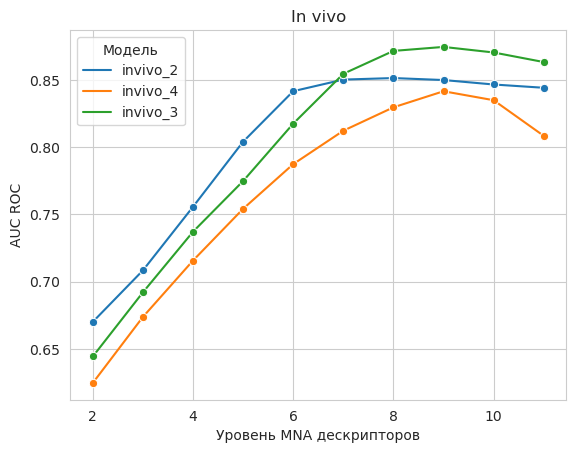

In [12]:
auc_plot = sns.lineplot(x='level', y='auc_roc', data=external_result, hue='model', marker="o")
plt.xlabel("Уровень MNA дескрипторов")
plt.ylabel("AUC ROC")
plt.title("In vivo")
plt.legend(title = "Модель")
plt.savefig("Proteasome/in_vivo/results/5CV/plots/auc_for_levels.png")
auc_plot

<Axes: title={'center': 'In vivo'}, xlabel='Уровень MNA дескрипторов', ylabel='Average precision'>

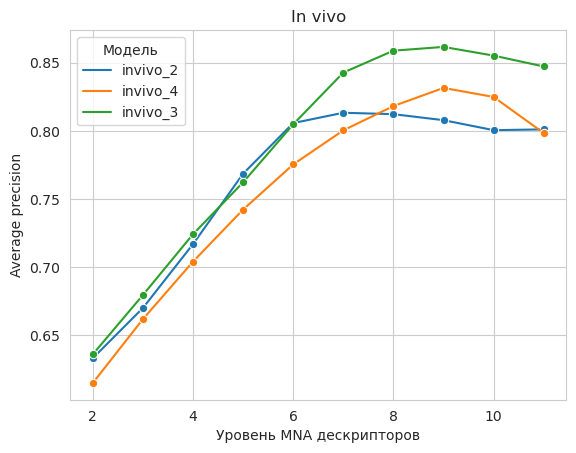

In [13]:
ap_plot = sns.lineplot(x='level', y='ap', data=external_result, hue='model', marker="o")
plt.xlabel("Уровень MNA дескрипторов")
plt.ylabel("Average precision")
plt.title("In vivo")
plt.legend(title = "Модель")
plt.savefig("Proteasome/in_vivo/results/5CV/plots/ap_for_levels.png")
ap_plot